# Gaia
## Real data!

gully  
Sept 14, 2016

### Outline:

1. Batch download the data
2. Compare TGAS and GaiaSource
3. Explore

**Import these first-- I auto import them every time!:**

In [1]:
#! cat /Users/gully/.ipython/profile_default/startup/start.ipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Batch download the data

In [3]:
import os

In [4]:
for i in range(16):
    fn = 'http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-{:03d}.csv.gz'.format(i)
    executable = 'wget '+fn
    print(executable)
    #os.system(executable) ## Uncomment to actually download

wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-000.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-001.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-002.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-003.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-004.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-005.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-006.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-007.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-008.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-009.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-010.csv.gz
wget http://cdn.gea.esac.esa.int/Gaia/tgas_source/csv/TgasSource_000-000-011

In [5]:
#! mv Tgas* ../data

In [6]:
#! gzip -d ../data/Tgas*

In [7]:
! ls ../data/Tgas*

../data/TgasSource_000-000-000.csv ../data/TgasSource_000-000-008.csv
../data/TgasSource_000-000-001.csv ../data/TgasSource_000-000-009.csv
../data/TgasSource_000-000-002.csv ../data/TgasSource_000-000-010.csv
../data/TgasSource_000-000-003.csv ../data/TgasSource_000-000-011.csv
../data/TgasSource_000-000-004.csv ../data/TgasSource_000-000-012.csv
../data/TgasSource_000-000-005.csv ../data/TgasSource_000-000-013.csv
../data/TgasSource_000-000-006.csv ../data/TgasSource_000-000-014.csv
../data/TgasSource_000-000-007.csv ../data/TgasSource_000-000-015.csv


Compare to a Gaia full catalog source (download from previous notebook or [manually](http://cdn.gea.esac.esa.int/Gaia/gaia_source/csv/)):

In [8]:
#! wget http://cdn.gea.esac.esa.int/Gaia/gaia_source/csv/GaiaSource_000-000-000.csv.gz
#! mv GaiaSource_000-000-000.csv.gz ../data/

In [9]:
! ls ../data/GaiaSource*

../data/GaiaSource_000-000-000.csv


### 2. Compare `TGAS` and `GaiaSource` files

In [10]:
import pandas as pd

In [11]:
%time t000 = pd.read_csv('../data/TgasSource_000-000-000.csv')

CPU times: user 1.78 s, sys: 107 ms, total: 1.89 s
Wall time: 1.89 s


In [12]:
%time g000 = pd.read_csv('../data/GaiaSource_000-000-000.csv')

CPU times: user 1.94 s, sys: 149 ms, total: 2.09 s
Wall time: 2.1 s


In [13]:
set(t000.columns) - set(g000.columns)

{'hip', 'tycho2_id'}

TGAS is just the subset with parallaxes available, while Gaia source has only Positions and Magnitudes but for billions of sources:

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr"><a href="https://twitter.com/hashtag/GaiaDR1?src=hash">#GaiaDR1</a> details: 1billion stars w/ position+magnitude; 2million stars w/ pos+mag+parallax+proper motion; 3194 variable stars; 2152 quasars</p>&mdash; ESA Science (@esascience) <a href="https://twitter.com/esascience/status/776001201511010304">September 14, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

In [14]:
len(t000), len(g000)

(134865, 218453)

In [15]:
p_i = t000.parallax == t000.parallax
tp000 = t000[p_i]
p_i.sum()

134865

In [16]:
p_i = g000.parallax == g000.parallax
gp000 = g000[p_i]
p_i.sum()

1651

In [17]:
sns.set_color_codes()

For a single file, TGAS covers much more area.  The file sizes are **capped** at 40 Mb.

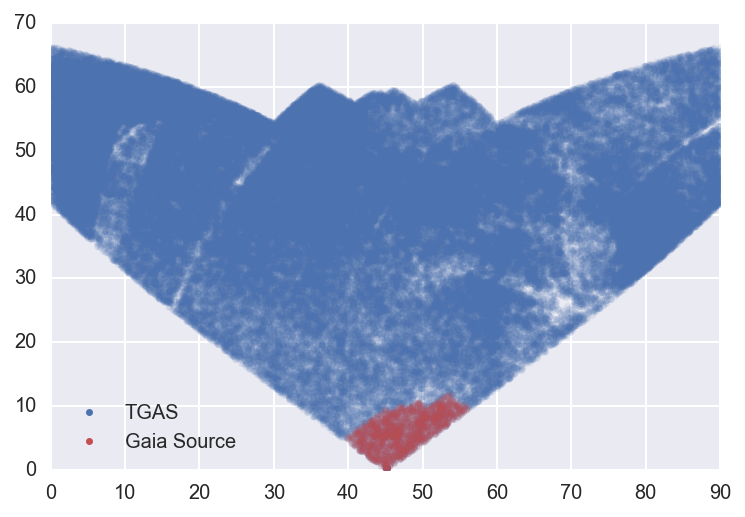

In [18]:
plt.plot(tp000.ra[0:2], tp000.dec[0:2], 'b.', label='TGAS') # Hack to get bold labels
plt.plot(gp000.ra[0:2], gp000.dec[0:2], 'r.', label='Gaia Source')
plt.plot(tp000.ra.values, tp000.dec.values, 'b.', alpha=0.1)
plt.plot(gp000.ra.values, gp000.dec.values, 'r.', alpha=0.1)
plt.legend(loc='lower left')

### 3. Explore!

In [19]:
df_list = []

This takes a finite amount of RAM, but should be fine for modern laptops.

In [20]:
for i in range(16):
    df_list.append(pd.read_csv('../data/TgasSource_000-000-{:03d}.csv'.format(i)))

In [21]:
tt = pd.concat(df_list, ignore_index=True)

In [22]:
t000.shape

(134865, 59)

In [24]:
tt.shape

(2057050, 59)

In [25]:
len(tt.source_id.unique())

2057050

So 2.05+ million sources with 59 "features" or columns of metadata.

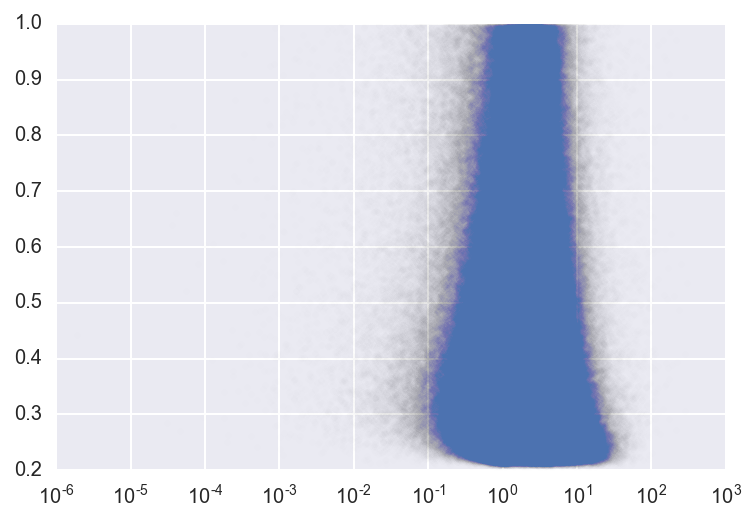

In [26]:
plt.plot(tt.parallax, tt.parallax_error, '.', alpha=0.005)
plt.xscale('log')

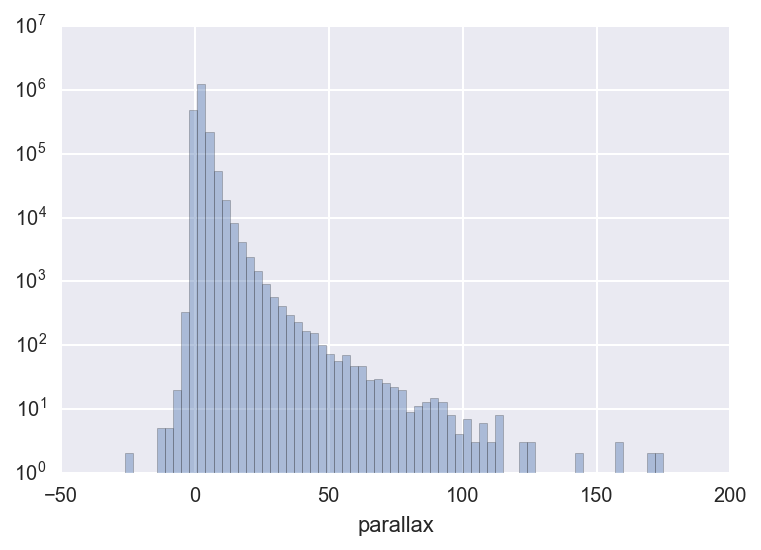

In [27]:
bins = np.arange(-50, 200, 3)
sns.distplot(tt.parallax, bins=bins,kde=False)
plt.yscale('log')

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


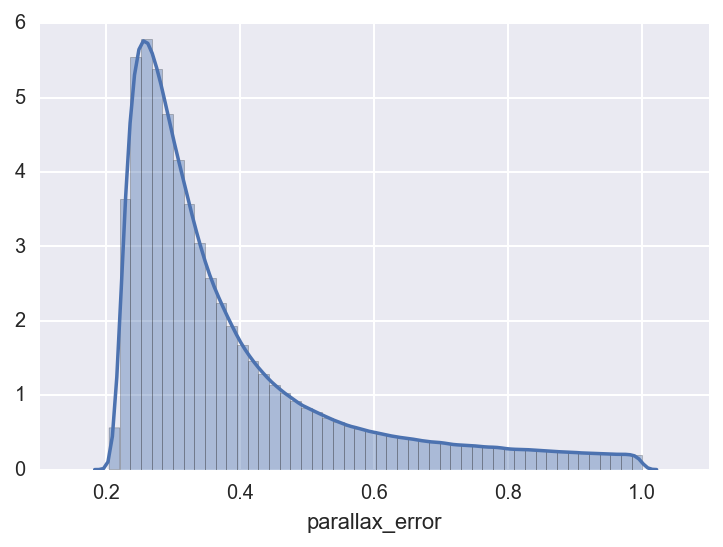

In [28]:
sns.distplot(tt.parallax_error)

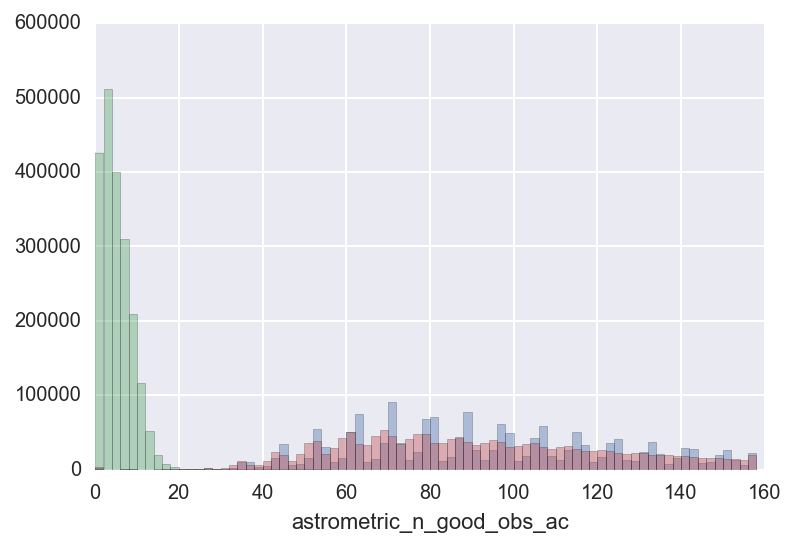

In [30]:
bins = np.arange(0, 160, 2)
sns.distplot(tt.astrometric_n_obs_ac, bins=bins, kde=False)
sns.distplot(tt.astrometric_n_bad_obs_ac, bins=bins, kde=False)
sns.distplot(tt.astrometric_n_good_obs_ac, bins=bins, kde=False)

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


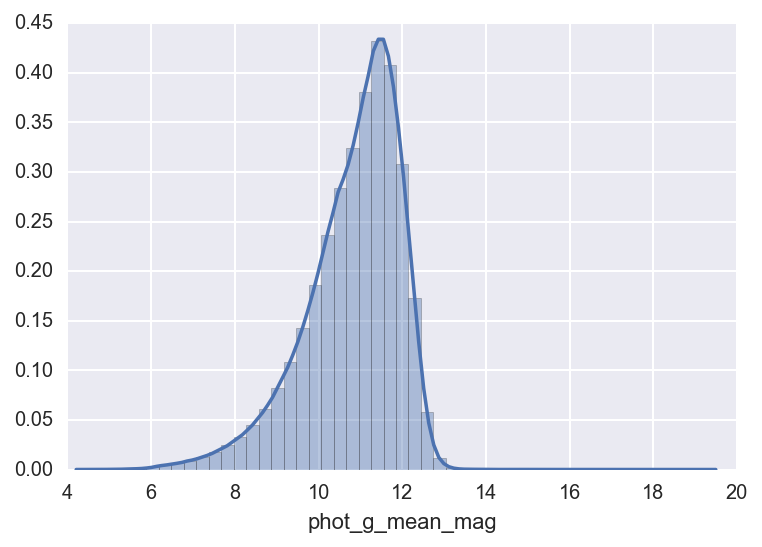

In [31]:
sns.distplot(tt.phot_g_mean_mag)

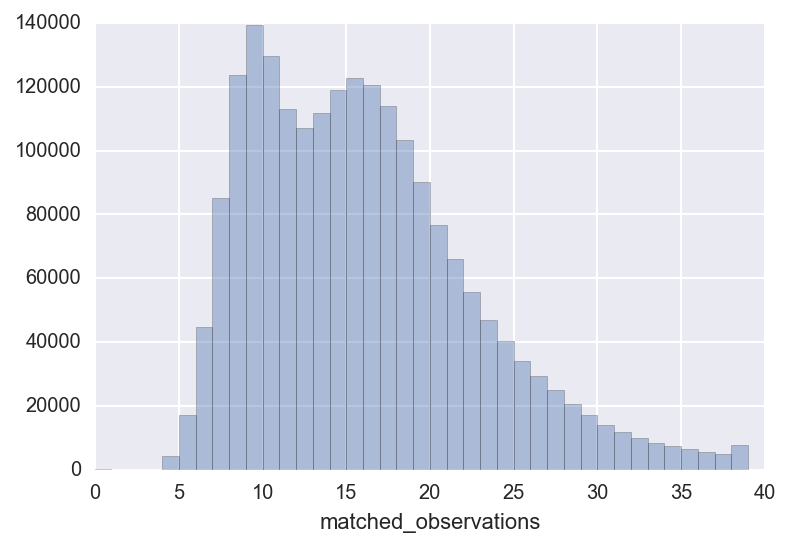

In [32]:
bins = np.arange(0,40,1)
sns.distplot(tt.matched_observations, bins=bins,kde=False)

In [33]:
tt.iloc[0]

hip                                            13989
tycho2_id                                        NaN
solution_id                      1635378410781933568
source_id                              7627862074752
random_index                                  243619
ref_epoch                                       2015
ra                                           45.0343
ra_error                                    0.305989
dec                                         0.235392
dec_error                                   0.218802
parallax                                     6.35295
parallax_error                               0.30791
pmra                                         43.7523
pmra_error                                 0.0705422
pmdec                                       -7.64199
pmdec_error                                0.0874018
ra_dec_corr                                -0.414972
ra_parallax_corr                            0.179966
ra_pmra_corr                                0.

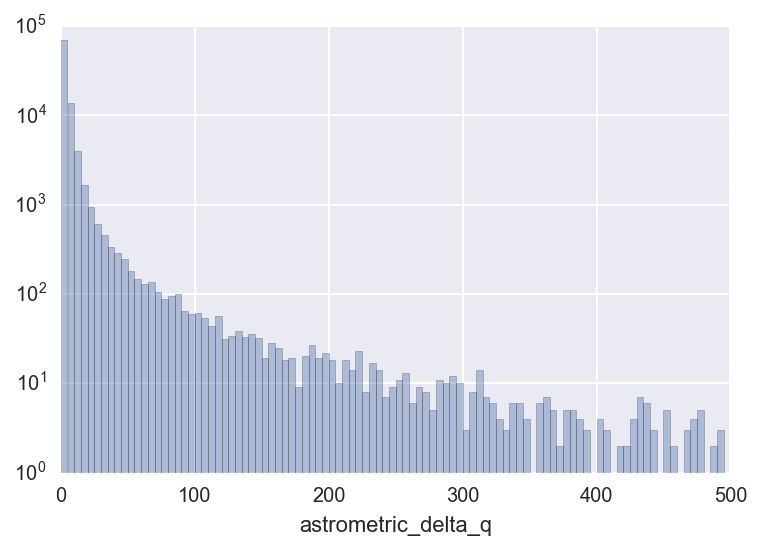

In [34]:
gi = tt.astrometric_delta_q == tt.astrometric_delta_q
bins= np.arange(0,500, 5)
sns.distplot(tt.astrometric_delta_q[gi], bins=bins, kde=False)
plt.yscale('log')

In [35]:
tt.phot_variable_flag.unique()

array(['NOT_AVAILABLE', 'VARIABLE'], dtype=object)

In [36]:
vi = tt.phot_variable_flag == 'VARIABLE'

In [37]:
vi.sum(), len(vi)

(1, 2057050)

Only one variable star of all the `TGAS` sample, about what you'd expect.

In [38]:
tt[vi]

,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
1398590,29055.0,NaN,1635378410781933568,5283957629860435072,1484959,2015.0,91.94041,0.129556,-66.977428,0.291615,...,6.455348,516,313636.500838,2817.124822,11.783704,VARIABLE,276.873805,-29.051596,209.455272,-89.128589


### The end.